In [6]:
%pylab inline
%matplotlib notebook
import requests



Populating the interactive namespace from numpy and matplotlib


/Users/orion/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['disp', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
from cdci_api_plugin.polar import PolarDispatcher as Polar

In [8]:
my_polar=Polar(host='10.194.169.161',port=32784)

In [9]:
my_polar.get_description()

AttributeError: 'PolarDispatcher' object has no attribute 'get_description'

In [5]:
help(my_polar.get_lc)

Help on method get_lc in module cdci_api_plugin.polar:

get_lc(self, src_name='polar_test_src', time_bin=0.2, time_bin_format='sec', T1_iso='2016-12-18T08:32:21.000', T2_iso='2016-12-18T08:34:01.000', E1_keV=10.0, E2_keV=100.0) method of cdci_api_plugin.polar.PolarDispatcher instance
    :param src_name: name of the source
    :param time_bin: delta t
    :param time_bin_format: t units for time_bin (seconds default)
    :param T1_iso: T start in isot
    :param T2_iso: T stop in isot
    :param E1_keV: E min in keV
    :param E2_keV: E max in keV
    :return:



In [6]:
rate,time,rate_err,res=my_polar.get_lc(T1_iso='2016-12-18T08:32:21.000',T2_iso='2016-12-18T08:34:01.000',time_bin=0.1)

<IPython.core.display.Javascript object>


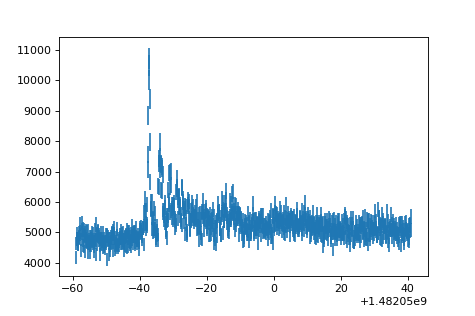

<Container object of 3 artists>

In [7]:
errorbar(time,rate,rate_err,ls="")
 

In [2]:
from cdci_api_plugin.isgri import IsgriDispatcher as Isgri
my_isgri=Isgri(host='10.194.169.161',port=32784)

In [3]:
my_isgri.get_description()

<class 'dict'> {'query_name': 'src_query'}
<class 'dict'> {'units': 'str', 'name': 'src_name', 'value': None}
<class 'dict'> {'units': 'deg', 'name': 'RA', 'value': 0.0}
<class 'dict'> {'units': 'deg', 'name': 'DEC', 'value': 0.0}
<class 'dict'> {'units': None, 'name': 'T1', 'value': '2001-12-11T00:00:00.000'}
<class 'dict'> {'units': None, 'name': 'T2', 'value': '2001-12-11T00:00:00.000'}
<class 'dict'> {'instrumet': 'isgri'}
<class 'dict'> {'query_name': 'src_query'}
<class 'dict'> {'units': 'str', 'name': 'src_name', 'value': None}
<class 'dict'> {'units': 'deg', 'name': 'RA', 'value': 0.0}
<class 'dict'> {'units': 'deg', 'name': 'DEC', 'value': 0.0}
<class 'dict'> {'units': None, 'name': 'T1', 'value': '2001-12-11T00:00:00.000'}
<class 'dict'> {'units': None, 'name': 'T2', 'value': '2001-12-11T00:00:00.000'}
<class 'dict'> {'query_name': 'isgri_parameters'}
<class 'dict'> {'units': 'str', 'name': 'user_catalog', 'value': None}
<class 'dict'> {'units': 'names_list', 'name': 'scw_lis

In [38]:
res=my_isgri.get_lc(T2_iso='2003-03-16T00:03:12.0',query_type='Real',time_bin=40)

working remotely, please wait
exit_status, status 0
exit_status, message 
exit_status, error_message 
exit_status, debug_message 
job_monitor {u'status': u'done', u'job_id': u'-5622313266135202452', u'session_id': u'XCBCI8VU483HOXYP'}
query_status done
products [u'job_id', u'file_name', u'image', u'input_prod_list', u'session_id', u'download_file_name', u'analysis_paramters', u'data', u'prod_process_message', u'name']


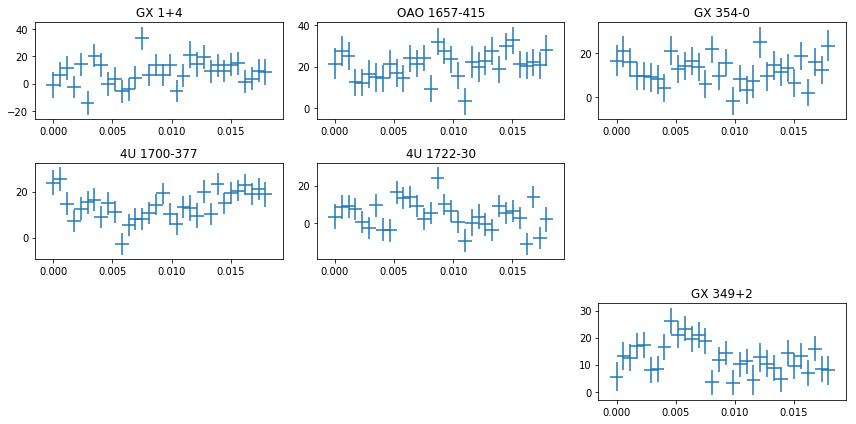

In [37]:
fig = plt.figure(figsize=(12,6))

for ID,_r in enumerate(res):
    plt.subplot('33%d'%ID)
    #print ('name',_r['name'],ID)
    x = np.array(_r['time'])
    x-=x.min()
    plt.errorbar(x,_r['rate'],_r['rate_err'],_r['time_del'],ls="")
    plt.title('%s'%_r['name'])
plt.tight_layout()
plt.show()

In [1]:
from cdci_api_plugin.api import DispatcherAPI


In [2]:
disp=DispatcherAPI(host='0.0.0.0',port=5000,instrument='mock')

In [3]:
disp.get_instruments_list()


instr mock


['isgri', 'jemx', 'polar']

In [4]:
disp.get_instrument_description('isgri')


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: None,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isgri_spectrum_query
 product_name: isgri_spectrum

----

In [5]:
disp.get_product_description(instrument='isgri',product_name='isgri_lc')

--------------
parameters for  product isgri_lc and instrument isgri

--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: None,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_lc_query
 product_name: isgri_lc
 name: time_bin,  value: 1000.0,  units: sec, 
